In [1]:
import torch
from torch.nn import Linear

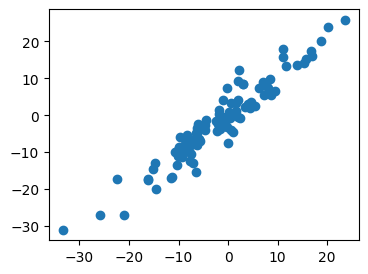

In [2]:
# Data
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)
x = torch.randn(100, 1) * 10
y = x + torch.randn(100, 1) * 3
plt.figure(figsize=(4,3))
plt.plot(x, y, 'o')

In [3]:
# Custom Models
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = self.linear(x)
    return pred

In [4]:
# Create model
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [6]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

In [7]:
# def criterion(yhat,y):
#    return torch.mean((yhat-y)**2)

In [8]:
losses = []
epochs = 100
for epoch in range(epochs):
  y_pred = model.forward(x)
  loss = criterion(y_pred, y)
  losses.append(loss.item())
  if epoch % 10 == 0:
    print("epoch:", epoch, "loss:", loss.item())
  optimizer.zero_grad() # w.grad.data.zero_()
  loss.backward()
  optimizer.step() # w.data -= lr * w.grad.data

epoch: 0 loss: 10.461551666259766
epoch: 10 loss: 10.294576644897461
epoch: 20 loss: 10.1857328414917
epoch: 30 loss: 10.114751815795898
epoch: 40 loss: 10.068442344665527
epoch: 50 loss: 10.038217544555664
epoch: 60 loss: 10.018478393554688
epoch: 70 loss: 10.005584716796875
epoch: 80 loss: 9.997156143188477
epoch: 90 loss: 9.991643905639648


In [9]:
# Parameters
w, b = model.parameters()
w1 = w.item() # w[0][0].item()
b1 = b.item() # b[0].item()
w1, b1

(1.0453596115112305, 0.06317011266946793)

In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.0454]], requires_grad=True), Parameter containing:
tensor([0.0632], requires_grad=True)]


Text(0, 0.5, 'Loss')

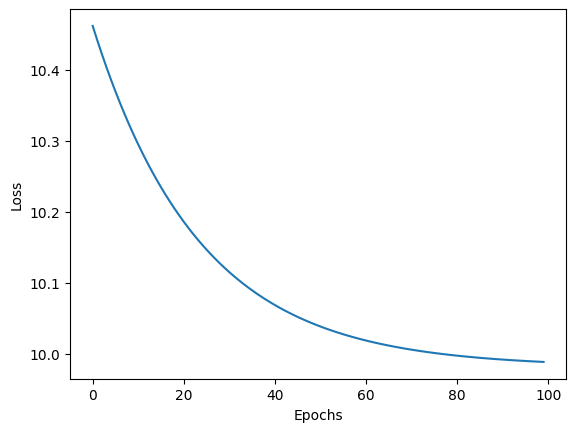

In [11]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')

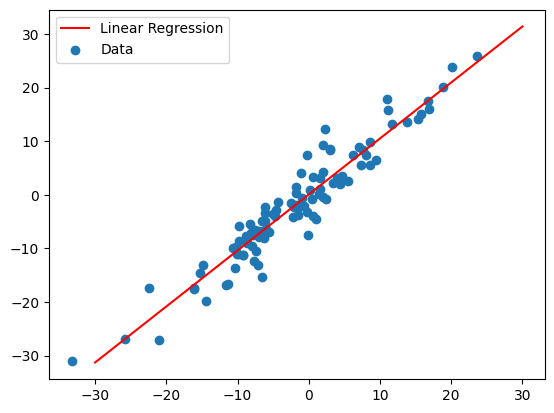

In [12]:
x1 = torch.tensor([[-30.0], [30.0]])
y1 = model.forward(x1)
plt.plot(x1.detach().numpy(), y1.detach().numpy(), 'r', label='Linear Regression')
plt.scatter(x.detach().numpy(), y.detach().numpy(), label='Data')
plt.legend()

In [13]:
# 1-point prediction
v = torch.tensor([2.0])
y = model.forward(v)
y

tensor([2.1539], grad_fn=<ViewBackward0>)

In [14]:
# 3-point prediction
v = torch.tensor([[2.0],[3.3],[0.1]])
y = model.forward(v)
y

tensor([[2.1539],
        [3.5129],
        [0.1677]], grad_fn=<AddmmBackward0>)

In [15]:
# Parameters
print("Python dictionary: ",model.state_dict())
print("keys: ",model.state_dict().keys())
print("values: ",model.state_dict().values())

Python dictionary:  OrderedDict([('linear.weight', tensor([[1.0454]])), ('linear.bias', tensor([0.0632]))])
keys:  odict_keys(['linear.weight', 'linear.bias'])
values:  odict_values([tensor([[1.0454]]), tensor([0.0632])])


In [16]:
print("weight:", model.linear.weight)
print("Value: ", model.state_dict()['linear.weight'])
print("bias:", model.linear.bias)
print("Value: ", model.state_dict()['linear.bias'])

weight: Parameter containing:
tensor([[1.0454]], requires_grad=True)
Value:  tensor([[1.0454]])
bias: Parameter containing:
tensor([0.0632], requires_grad=True)
Value:  tensor([0.0632])


In [17]:
list(model.parameters())

[Parameter containing:
 tensor([[1.0454]], requires_grad=True),
 Parameter containing:
 tensor([0.0632], requires_grad=True)]